# Task 1:
## Implement the Adam (Mini-Batch Version) algorithm to train a multivariable linear regression model.


### Please fulfil the following requirements:
<br>
<b>
    
    1. Check your implementation on the data in the attached file.
    2. You must obtain r2-score > 0.9.
    3. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    4. Choose hyper parameters to obtain the required accuracy.
    5. The implementation must be vectoried and calculations must be performed as matrix vector 
    multiplications.
    6. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>

In [1]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
import pandas as pd
import math
from sklearn.metrics import r2_score


In [2]:
df=pd.read_csv("MultiVarLR.csv", header=None)


In [3]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]


# prepare the data

In [4]:
ones = np.ones((X.shape[0], 1)) 
X = np.hstack((ones, X))
Y=Y.to_numpy().reshape((-1,1))

##### shuffle the data
perm = np.random.permutation(len(X))
X = X[perm]
Y = Y[perm]

In [5]:
def optimize_using_ADAM(X, Y,lr,iterations, bSize, eps,beta1, beta2):
   
    
    losses=[]
    m=len(X)
    batches=int(m/bSize)
    thetas=np.zeros((X.shape[1],1))
    all_thetas_updates=[]
    m=np.zeros((X.shape[1],1))
    v=np.zeros((X.shape[1],1))
    for i in range(0,iterations):
        
        for j in range(0,batches):
           
            all_thetas_updates.append(thetas)
            X_b=X[j*bSize: (j*bSize)+bSize]
            Y_b=Y[j*bSize:(j*bSize)+bSize]
            h_0= X_b @ thetas
            error=h_0-Y_b
            mse= (error.T@error) / (len(error)*2)
            losses.append(mse[0])
            d_thetas= X_b.T @error /len(error)
            
            
            m_hats=m/ (1-beta1)
            v_hats=v/ (1-beta2)
            
            v=(beta2*v) +  (1-beta2)*(d_thetas*d_thetas)
            m=(beta1*m) +  (1-beta1)*(d_thetas)
          
            thetas=thetas- (lr/(np.sqrt(v_hats)+eps)*m_hats)
        norm = np.linalg.norm(d_thetas)
        if(norm<= 0.001): 
            return thetas,losses,all_thetas_updates
        if i>1 and abs(losses[(i-1)*batches]-losses[i*batches])<0.001:
            return thetas,losses,all_thetas_updates
        
        
        if(i==iterations-1):
                return thetas,losses,all_thetas_updates

In [6]:
def plot_losses(losses):
    plt.plot( losses, '-o')

def plot_thetas_loss(updated_thetas, losses):
    num_thetas = len(updated_thetas[0])
    fig, axes = plt.subplots(nrows=num_thetas, ncols=1, figsize=(6, 6*num_thetas))
    for i, ax in enumerate(axes):
        thetas_i = [thetas[i] for thetas in updated_thetas]
        ax.plot(thetas_i, losses, '-o')
        ax.set_xlabel(f"theta{i}")
        ax.set_ylabel("loss")
    plt.show()
    

In [7]:
thetas,losses,all_thetas_updates=optimize_using_ADAM(X, Y,  0.01,5000,len(X), 1e-08,0.9,0.99)


In [8]:
y_pred= X @ thetas
r2_score(Y,y_pred)


0.9778374513705552

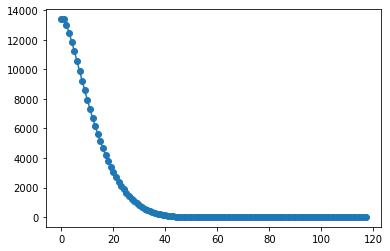

In [9]:
plot_losses(losses)


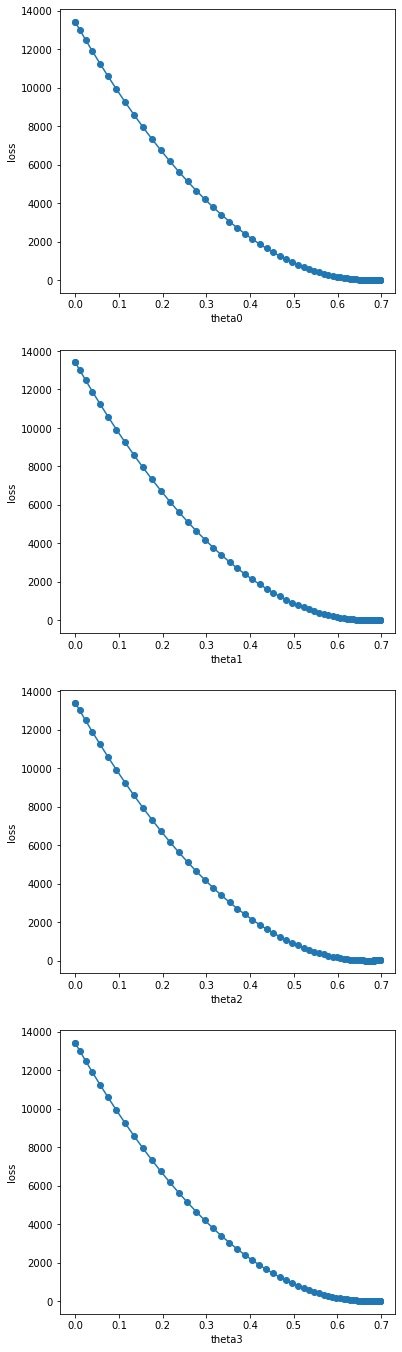

In [259]:
plot_thetas_loss(all_thetas_updates, losses)


# Task 2
## Repeat task 1 using BFGS optimizer instead of Adam.
### All the requirments stated in task 1 must be also fulfilled in task 2.
### Compare the results from task 1 and task 2 and write your conclusion. 

<font color='red'><b><b><i>Notes:</i></b></font>
    
<font color='red'><b><b><i>You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b></font>

<font color='red'><b><i>Any copied code from the internet will be considered as cheeeting</i></b></i></b></font>

<font color='red'><b><i>Any code exchange between trainees will be considered as cheeeting</i></b></font>

In [10]:
def get_DF(thetas, X,Y):
    
    h_0= X@ thetas
    error=h_0-Y
    return X.T @error /len(error)
    

In [11]:
def optimize_using_BFGS(X, Y,iterations, bSize, epsilon, lr=1):
    thetas_prev = np.zeros((X.shape[1],1))
    thetas_current=thetas_prev+0.0001
    B = np.eye(len(thetas_current))
    losses=[]
    m=len(X)
    batches=int(m/bSize)
    all_thetas_updates=[]
        
    
    for i in range(0,iterations):
        
        for j in range(0,batches):
           
            all_thetas_updates.append(thetas_current)
            X_b=X[j*bSize: (j*bSize)+bSize]
            Y_b=Y[j*bSize:(j*bSize)+bSize]
            h_0= X_b @ thetas_current
            error=h_0-Y_b
            mse= (error.T@error) / (len(error)*2)
            losses.append(mse[0])
            grade=get_DF(thetas_current,X_b,Y_b)
            delta_thetas = thetas_current - thetas_prev
            y =get_DF(thetas_current,X_b,Y_b)-get_DF(thetas_prev,X_b,Y_b) 
            rho = 1 / np.dot(y.T, delta_thetas)
            B = ((np.eye(len(thetas_current)) - rho * np.outer(delta_thetas, y)) @ B @ (np.eye(len(thetas_current)) - rho * np.outer(y, delta_thetas))) + rho * np.outer(delta_thetas, delta_thetas)
            thetas_new = thetas_current - (lr * (np.dot(B, get_DF(thetas_current,X_b,Y_b))))
            thetas_current = thetas_new
        

        norm = np.linalg.norm(grade)
        if(norm<= 0.001): 
            #print("h33")
            return thetas_current,losses,all_thetas_updates
        if i>0 and abs(losses[(i-1)*batches]-losses[i*batches])<0.001:
            return thetas_current,losses,all_thetas_updates
        
        
        if(i==iterations-1):
                #print("f")
                return thetas_current,losses,all_thetas_updates

In [12]:
thetas,losses,all_thetas_updates=optimize_using_BFGS(X, Y, 5000,len(X),  0.001, 0.9)


In [13]:
y_pred= X @ thetas
r2_score(Y,y_pred)


0.9895913173089799

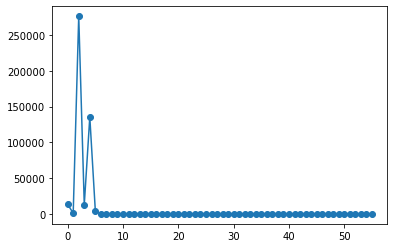

In [14]:
plot_losses(losses)


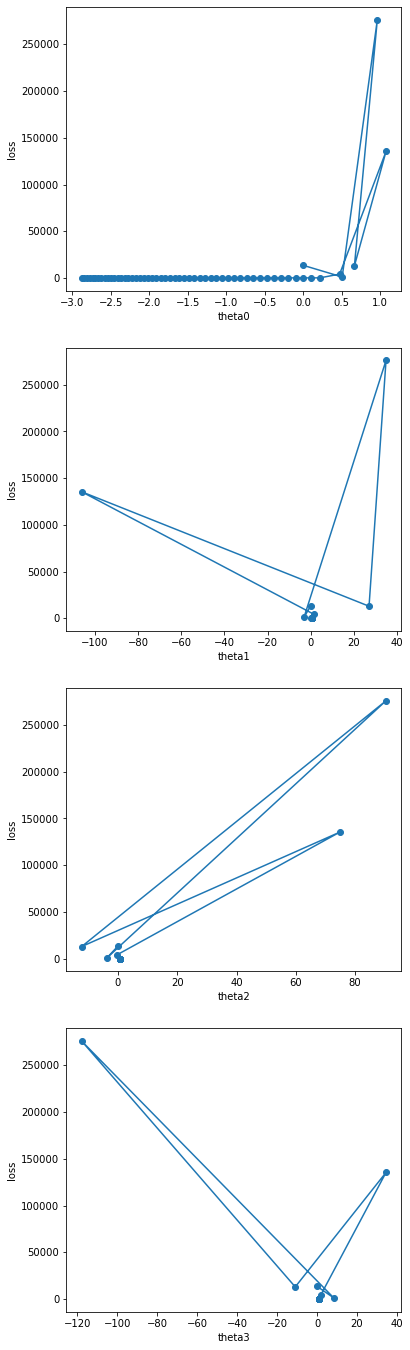

In [15]:
plot_thetas_loss(all_thetas_updates, losses)


# conclusion

### in BFGS i can converge very fast (with very small number of  iterations), becuase  BFGS uses an approximation of the Hessian matrix to update the search direction at each iteration, which takes into account the curvature of the error function
### but to reach this small number of iterations, i made the learning rate very large , which  leads to make  the update step is very large, as we can see in  (the curve of thetas with the error) every update to theta is so far from it's previous update. 
### In ADAM optimizer, the learning rate determines the size of the update at each iteration, and a high learning rate can cause the updates to be too large and prevent convergence. 
